In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
# The path to our CSV file
school_saftey = "Resources/2010-2016-school-safety-report.csv"

In [4]:
# Read our Kickstarter data into pandas
school_saftey_df = pd.read_csv(school_saftey, dtype={'Postcode':str})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
school_saftey_df

,School Year,Building Code,DBN,Location Name,Location Code,Address,Postcode,Borough,Borough Name,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2015-16,M933,02M933,City Knoll Middle School,M339,425 WEST 33RD STREET,10001,M,MANHATTAN,2.0,157,NaN,1,City Knoll Middle School,0.0,0.0,0.0,0.0,0.0,2C,1-250,0.24,0.71,1.71,0.51,0.32,40.753091,-73.997640,4,3,103,1012851.0,1.007310e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
1,2015-16,M920,02M570,Satellite Academy High School,M570,120 WEST 30 STREET,10001,M,MANHATTAN,2.0,266,NaN,1,Satellite Academy High School,0.0,0.0,1.0,0.0,0.0,3C,251-500,0.27,0.90,1.67,0.63,0.44,40.747621,-73.990454,5,3,95,1015148.0,1.008050e+09,Midtown-Midtown South ...
2,2015-16,M033,02M033,P.S. 033 Chelsea Prep,M033,281 9 AVENUE,10001,M,MANHATTAN,2.0,639,NaN,1,P.S. 033 Chelsea Prep,1.0,0.0,2.0,1.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,40.748818,-73.999646,4,3,97,1012829.0,1.007240e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
3,2014-15,M033,02M033,P.S. 033 Chelsea Prep,M033,281 9 AVENUE,10001,M,MANHATTAN,2.0,634,NaN,1,P.S. 033 Chelsea Prep,1.0,1.0,0.0,2.0,0.0,4C,501-750,0.31,1.12,1.82,0.79,0.51,40.748818,-73.999646,4,3,97,1012829.0,1.007240e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,2014-15,M920,02M570,Satellite Academy High School,M570,120 WEST 30 STREET,10001,M,MANHATTAN,2.0,266,NaN,1,Satellite Academy High School,0.0,2.0,1.0,2.0,0.0,3C,251-500,0.27,1.11,1.38,0.80,0.48,40.747621,-73.990454,5,3,95,1015148.0,1.008050e+09,Midtown-Midtown South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,2013-14,Q225,NaN,190 BEACH 110 STREET CONSOLIDATED LOCATION,NaN,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,615,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,0.0,0.0,3.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6282,2013-14,Q225,27Q317,WATERSIDE CHILDREN'S STUDIO SCHOOL,Q317,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,441,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6283,2013-14,Q225,27Q318,WATERSIDE SCHOOL FOR LEADERSHIP,Q318,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,174,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,NaN,NaN,NaN,NaN,NaN,2C,1-250,NaN,NaN,NaN,NaN,NaN,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6284,2013-14,Q180,27Q323,Scholars' Academy,Q323,320 BEACH 104TH STREET,11694,Q,QUEENS,27.0,"1,253",NaN,1,Scholars' Academy,1.0,1.0,0.0,2.0,0.0,7C,1251-1500,0.86,3.26,5.55,2.17,1.29,40.584109,-73.825711,14,32,938,4303722.0,4.161590e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...


In [5]:
# Delete the columns not pertinent to our analysis:
reduced_school_saftey_df = school_saftey_df.drop(columns=['School Year', 'Building Code', 'DBN', 'Location Code', 'Address', 'Borough', 'Geographical District Code', 'Register', 'Building Name', 'Schools in Building', 'ENGroupA', 'RangeA', 'Latitude', 'Longitude', 'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'])
reduced_school_saftey_df

,Location Name,Postcode,Borough Name,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29


In [6]:
# Rename the column names to be more descriptive
reduced_school_saftey_df.rename(columns = {'Postcode': 'Zip',
                                        'Major N': 'Number of Major Crimes',
                                        'Oth N': 'Number of Other Crimes',
                                        'NoCrim N': 'Number of Non-Criminal Crimes',
                                        'Prop N': 'Number of Property Crimes',
                                        'Vio N': 'Number of Violent Crimes',
                                        'AvgOfMajor N': 'Average of Major Crimes',
                                        'AvgOfOth N': 'Average of Other Crimes',
                                        'AvgOfNoCrim N':' Average of Non-Criminal Crimes',
                                        'AvgOfProp N': 'Average of Property Crimes',
                                        'AvgOfVio N': 'Average of Violent Crimes'}, inplace=True)
reduced_school_saftey_df

,Location Name,Zip,Borough Name,# Schools,Number of Major Crimes,Number of Other Crimes,Number of Non-Criminal Crimes,Number of Property Crimes,Number of Violent Crimes,Average of Major Crimes,Average of Other Crimes,Average of Non-Criminal Crimes,Average of Property Crimes,Average of Violent Crimes
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29


In [7]:
## Sum up all of the school crimes by row and create a new column with the crime total
# Make list of the columns we want to sum:
crimes_list = ['Number of Major Crimes', 'Number of Other Crimes', 'Number of Non-Criminal Crimes', 'Number of Property Crimes', 'Number of Violent Crimes']
# Sum the crimes for each row and place in a new column titled "Total Crimes"
reduced_school_saftey_df['Total Crimes'] = reduced_school_saftey_df[crimes_list].sum(axis=1)
reduced_school_saftey_df

,Location Name,Zip,Borough Name,# Schools,Number of Major Crimes,Number of Other Crimes,Number of Non-Criminal Crimes,Number of Property Crimes,Number of Violent Crimes,Average of Major Crimes,Average of Other Crimes,Average of Non-Criminal Crimes,Average of Property Crimes,Average of Violent Crimes,Total Crimes
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32,0.0
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44,1.0
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53,4.0
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51,4.0
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59,3.0
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29,4.0


In [32]:
# Export to xlsx file:
reduced_school_saftey_df.to_csv("Cleaned_School_Saftey.csv")

In [9]:
# Create a new dataframe showing the total # of school crimes by zip code:
total_crimes_by_zip = reduced_school_saftey_df.groupby(['Zip'], as_index=False).agg({'Total Crimes': 'sum'})
total_crimes_by_zip

,Zip,Total Crimes
0,10001,19.0
1,10002,513.0
2,10003,306.0
3,10004,127.0
4,10006,107.0
...,...,...
168,11436,73.0
169,11691,191.0
170,11692,46.0
171,11693,22.0


In [31]:
# Find the avgerage number of crimes by zip code (total crimes/number of schools in the county):
zip_avg_crimes_summary_df = reduced_school_saftey_df.groupby(['Zip'], as_index=False).agg({'Total Crimes': 'mean'})
zip_avg_crimes_summary_df.rename(columns = {'Total Crimes': 'Avg # of Crimes per School'}, inplace=True)
zip_avg_crimes_summary_df
# Save DF as csv:
zip_avg_crimes_summary_df.to_csv("avg_crimes_by_zip.csv", encoding="utf-8", index=False)

In [13]:
# Bring in the Lottery Sales Data:
lottery = "Resources/NYS_Lottery_Retailers.csv"
lottery_df = pd.read_csv(lottery)
lottery_df.head()

,Retailer,Name,Street,City,State,Zip,Quick Draw,Latitude,Longitude,Location 1
0,105093,M&M MART,591 BROADWAY,ALBANY,NY,12204,NaN,42.704236,-73.714150,"(42.704236, -73.71415)"
1,106969,139 GOURMET DELI,274 ALEXANDER AVE,BRONX,NY,10454,NaN,40.810561,-73.924557,"(40.810561, -73.924557)"
2,44612,STEWART'S SHOPS #383,10211 STATE HIGHWAY 56,MASSENA,NY,13662,NaN,44.921677,-74.917893,"(44.921677, -74.917893)"
3,76376,7-ELEVEN #35106,6444 OLEAN RD,SOUTH WALES,NY,14139,NaN,42.709300,-78.577400,"(42.7093, -78.5774)"
4,31292,STEWART'S SHOPS #267,204 HENRY JOHNSON BLVD,ALBANY,NY,12210,NaN,42.663289,-73.759051,"(42.663289, -73.759051)"


In [14]:
# Check the data types of the lottery dataframe to ensure proper merge:
lottery_df.dtypes

Retailer        int64
Name           object
Street         object
City           object
State          object
Zip             int64
Quick Draw     object
Latitude      float64
Longitude     float64
Location 1     object
dtype: object

In [15]:
zip_avg_crimes_summary_df.dtypes

Zip                            object
Avg # of Crimes per School    float64
dtype: object

In [16]:
# Change the school crimes dataframe Zip type to integers
zip_avg_crimes_summary_df['Zip']=zip_avg_crimes_summary_df['Zip'].astype(int)
zip_avg_crimes_summary_df.dtypes

Zip                             int64
Avg # of Crimes per School    float64
dtype: object

In [17]:
# Merge the School Saftey and the Lottery Dataframes:
merged_df = pd.merge(zip_avg_crimes_summary_df, lottery_df, on="Zip",  how='left')
pd.set_option('display.max_rows', 10)
merged_df

,Zip,Avg # of Crimes per School,Retailer,Name,Street,City,State,Quick Draw,Latitude,Longitude,Location 1
0,10001,2.111111,78677.0,7-ELEVEN #35630A,302 8TH AVE,NEW YORK,NY,Y,40.746610,-73.997120,"(40.74661, -73.99712)"
1,10001,2.111111,94590.0,PRADEEP MAYANI NEWSSTAND,164 W 34TH ST,NEW YORK,NY,NaN,40.750587,-73.989687,"(40.750587, -73.989687)"
2,10001,2.111111,104899.0,PUR VAPE AND SMOKE INC,346 9TH AVE,NEW YORK,NY,NaN,40.750595,-73.998026,"(40.750595, -73.998026)"
3,10001,2.111111,105011.0,CHOITHRAMS USA LLC,239 9TH AVE,NEW YORK,NY,NaN,40.747684,-74.000864,"(40.747684, -74.000864)"
4,10001,2.111111,108747.0,99 DISCOUNT STORE LIN INC.,370 8TH AVENUE,NEW YORK,NY,Y,40.748700,-73.995783,"(40.7487, -73.995783)"
...,...,...,...,...,...,...,...,...,...,...,...
5827,11694,5.535714,27772.0,101 DELI CORP,100-16 ROCKAWAY BEACH BLVD,ROCKAWAY PARK,NY,Y,40.583682,-73.821494,"(40.583682, -73.821494)"
5828,11694,5.535714,104497.0,ROCKAWAY BITES DELI & GRILL CO,104-06 ROCKAWAY BEACH BLVD,ROCKAWAY PARK,NY,NaN,40.583273,-73.825365,"(40.583273, -73.825365)"
5829,11694,5.535714,100026.0,SWEET SIXTEEN PARTY & GIFTS,200 BEACH 116TH ST,ROCKAWAY PARK,NY,Y,40.579804,-73.837120,"(40.579804, -73.83712)"
5830,11694,5.535714,62999.0,BEACH CONVENIENCE,202 BEACH 116TH ST,ROCKAWAY PARK,NY,Y,40.579834,-73.837137,"(40.579834, -73.837137)"


In [18]:
# Drop the Columns not pertinent to analysis:
merged_df = merged_df.drop(columns=['Street', 'State', 'Quick Draw', 'Latitude', 'Longitude', 'Location 1'])
merged_df

,Zip,Avg # of Crimes per School,Retailer,Name,City
0,10001,2.111111,78677.0,7-ELEVEN #35630A,NEW YORK
1,10001,2.111111,94590.0,PRADEEP MAYANI NEWSSTAND,NEW YORK
2,10001,2.111111,104899.0,PUR VAPE AND SMOKE INC,NEW YORK
3,10001,2.111111,105011.0,CHOITHRAMS USA LLC,NEW YORK
4,10001,2.111111,108747.0,99 DISCOUNT STORE LIN INC.,NEW YORK
...,...,...,...,...,...
5827,11694,5.535714,27772.0,101 DELI CORP,ROCKAWAY PARK
5828,11694,5.535714,104497.0,ROCKAWAY BITES DELI & GRILL CO,ROCKAWAY PARK
5829,11694,5.535714,100026.0,SWEET SIXTEEN PARTY & GIFTS,ROCKAWAY PARK
5830,11694,5.535714,62999.0,BEACH CONVENIENCE,ROCKAWAY PARK


In [19]:
# Show the number of loterry retailers for each zip code to see the range:
retailers_per_zip = merged_df.groupby('Zip', as_index=False).count()
pd.set_option('display.max_rows', None)
retailers_per_zip

,Zip,Avg # of Crimes per School,Retailer,Name,City
0,10001,47,47,47,47
1,10002,59,59,59,59
2,10003,38,38,38,38
3,10004,18,18,18,18
4,10006,3,3,3,3
5,10007,20,20,20,20
6,10009,28,28,28,28
7,10010,23,23,23,23
8,10011,30,30,30,30
9,10013,65,65,65,65


In [50]:
# Build a dataframe displaying Zip Codes with more than 50 lottery retailers:
high_lottery_zips = retailers_per_zip['Retailer'] > 50
high_lottery_zips_df = retailers_per_zip

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50      True
51      True
52      True
53      True
54     False
55     False
56     False
57      True
58      True
59     False
60     False
61      True
62      True
63     False
64     False
65     False
66     False
67      True
68     False
69     False
70     False
71     False
72      True
73     False
74     False
75     False
76     False

In [35]:
# Display the top 10 zip codes with the highest # of lottery retailers:
top_10_lottery_zips = retailers_per_zip.nlargest(10, 'Retailer')
top_10_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,Name,City
146,11385,123,123,123,123
103,11220,110,110,110,110
136,11368,93,93,93,93
140,11373,78,78,78,78
95,11212,76,76,76,76
90,11207,75,75,75,75
139,11372,73,73,73,73
143,11377,73,73,73,73
109,11226,72,72,72,72
97,11214,71,71,71,71


In [37]:
# Make a dataframe with the avg # of crimes per school for the top 10 zip codes with the most lottery retailers:
top_10_lottery_zips_list = [11207, 11212, 11214, 11220, 11226, 11368, 11373, 11377, 11385]
top_10_lottery_zips = merged_df.loc[merged_df['Zip'].isin([11207, 11212, 11214, 11220, 11226, 11368, 11373, 11377, 11385])]
top_10_lottery_df = top_10_lottery_zips.groupby('Zip').first().reset_index()
top_10_lottery_df

,Zip,Avg # of Crimes per School,Retailer,Name,City
0,11207,4.068702,78303.0,TRIDEV PETROLEUM INC,BROOKLYN
1,11212,4.015748,11720.0,SQUARE DEAL PHARMACY,BROOKLYN
2,11214,4.360000,102655.0,17TH MINI MART INC,BROOKLYN
3,11220,3.333333,108205.0,ABSOLUTERX PHARMACY INC.,BROOKLYN
4,11226,3.606061,89597.0,PAY-O-MATIC CORP #139,BROOKLYN
5,11368,1.777778,110941.0,CF 99 CENT UP & BEAUTY INC,CORONA
6,11373,2.392157,97966.0,WINGHING 99 CENTS STORE INC,ELMHURST
7,11377,1.888889,106328.0,J CHINA MARKET INC,WOODSIDE
8,11385,3.829268,19959.0,GOOD LUCKY CHARM GIFT SHOP INC,RIDGEWOOD


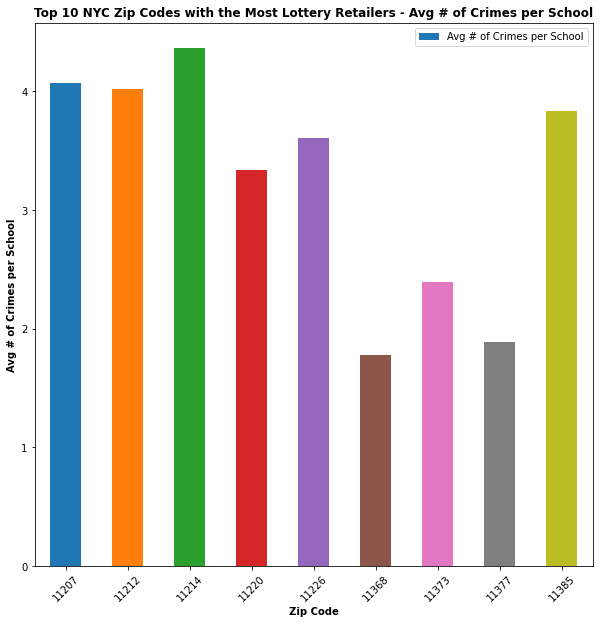

In [38]:
# Bar graph displaying the avg # of crimes per school for the top 10 zip codes with the most lottery retailers
top_10_lottery_df.plot(kind="bar", y="Avg # of Crimes per School", color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], figsize=(10, 10))
plt.title("Top 10 NYC Zip Codes with the Most Lottery Retailers - Avg # of Crimes per School", fontweight='bold')
plt.xlabel("Zip Code", fontweight = 'bold')
plt.ylabel("Avg # of Crimes per School", fontweight = 'bold')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8] 
plt.xticks(x, high_lottery_zips_list, rotation=45)
plt.savefig("Images/top_10_lottery_school_crimes.png")
plt.show()

In [23]:
# Display the average # of crimes per school for zip codes with more than 70 retailers:
avg_high_lottery_df = high_lottery_df["Avg # of Crimes per School"].mean()
avg_high_lottery_df

3.2524373425623363

In [24]:
# Display the Zip Codes with less than 5 retailers:
low_lottery_zips = retailers_per_zip.loc[retailers_per_zip['Retailer'] < 5]
pd.set_option('display.max_rows', None)
low_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,Name,City
4,10006,3,3,3,3
33,10044,2,2,2,2
37,10280,1,1,1,1
38,10282,1,1,1,1
64,10464,1,1,1,1
84,11109,1,0,0,0
121,11239,3,3,3,3
122,11249,4,4,4,4
128,11360,4,4,4,4
131,11363,2,2,2,2


In [40]:
# Display the bottom 10 zip codes with the lowest # of lottery retailers:
bottom_10_lottery_zips = retailers_per_zip.nsmallest(10, 'Retailer')
bottom_10_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,Name,City
84,11109,1,0,0,0
37,10280,1,1,1,1
38,10282,1,1,1,1
64,10464,1,1,1,1
33,10044,2,2,2,2
131,11363,2,2,2,2
4,10006,3,3,3,3
121,11239,3,3,3,3
122,11249,4,4,4,4
128,11360,4,4,4,4


In [41]:
# Make a dataframe with the avg # of crimes per school for the bottom 10 zip codes with the lowest # of lottery retailers:
bottom_10_lottery_zips_list = [10006, 10044, 10280, 10282, 10464, 11109, 11239, 11249, 11360, 11363]
bottom_10_lottery_zips = merged_df.loc[merged_df['Zip'].isin([10006, 10044, 10280, 10282, 10464, 11109, 11239, 11249, 11360, 11363])]
bottom_10_lottery_df = low_lottery_zips.groupby('Zip').first().reset_index()
bottom_10_lottery_df

,Zip,Avg # of Crimes per School,Retailer,Name,City
0,10006,17.833333,110661.0,7-ELEVEN #38310H,NEW YORK
1,10044,0.666667,98616.0,GRISTEDES #517,NEW YORK
2,10280,0.666667,79034.0,GRISTEDES NO 40,NEW YORK
3,10282,1.583333,83041.0,BATTERY PARK GOURMET MARKET,NEW YORK
4,10464,0.666667,88628.0,CONVENIENCE MART CORP,BRONX
5,11109,0.333333,NaN,NaN,NaN
6,11239,1.928571,85905.0,PATEL ENTERPRISES LLC,BROOKLYN
7,11249,4.333333,108170.0,BEDFORD FRUIT MARKET,BROOKLYN
8,11360,0.222222,18487.0,7-ELEVEN #32121,BAYSIDE
9,11363,0.000000,104222.0,MIKE & FAYE DELI GROCERY INC,LITTLE NECK


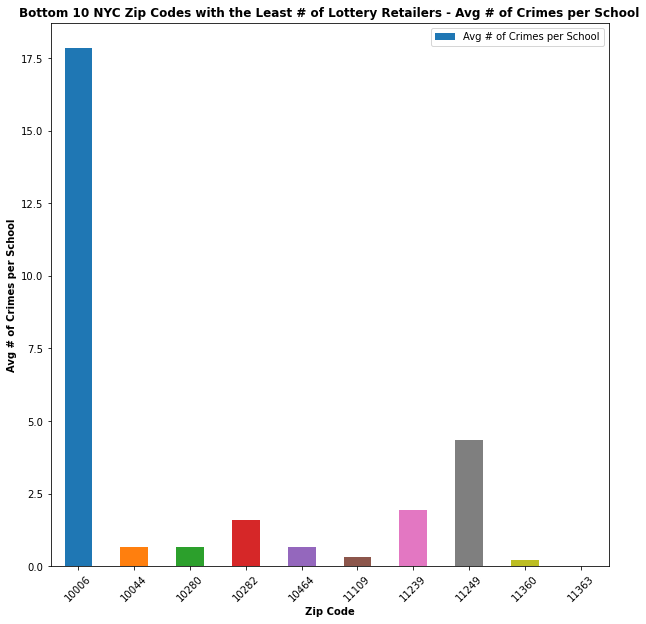

In [43]:
# Bar graph displaying the avg # of crimes per school for the bottom 10 zip codes with the lowest # of lottery retailers
bottom_10_lottery_df.plot(kind="bar", y="Avg # of Crimes per School", color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], figsize=(10, 10))
plt.title("Bottom 10 NYC Zip Codes with the Least # of Lottery Retailers - Avg # of Crimes per School", fontweight='bold')
plt.xlabel("Zip Code", fontweight = 'bold')
plt.ylabel("Avg # of Crimes per School", fontweight = 'bold')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
plt.xticks(x, low_lottery_zips_list, rotation=45)
plt.savefig("Images/bottom_10_lottery_school_crimes.png")
plt.show()

In [27]:
# Look at the correlation between the number of lottery retailers and the avg # of crimes per school with a scatterplot:
# Define plotting function:
# def plot_linear_regression(x_values, y_values, title, text_coordinates):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
#     plt.xlabel("Zip Code") 
#     plt.ylabel("Avg # of Crimes per School")
#     print(f"The r-squared is: {rvalue}")

The r-squared is: -0.1805136924234508


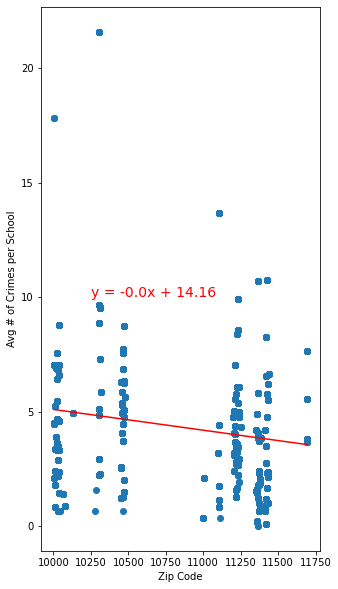

In [33]:
# # Build the Plot
# fig = plt.gcf()
# fig.set_size_inches(5,10)
# x_values = merged_df["Zip"]
# y_values = merged_df["Avg # of Crimes per School"]
# plot_linear_regression(x_values,y_values,'Avg # of Crimes per School', (10250, 10))

# # Save Figure
# plt.savefig("Images/Lottery_School_Crimes_Correlation.png")

# # Show Plot
# plt.show()